In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
file_url = "https://raw.githubusercontent.com/fenago/datasets/refs/heads/main/taxstats2015.csv"

In [4]:
df = pd.read_csv(file_url,usecols=['Postcode','Average net tax', 'Average total deductions'])
df.head()

,Postcode,Average total deductions,Average net tax
0,2000,2071,27555
1,2006,3804,28142
2,2007,1740,15649
3,2008,3917,53976
4,2009,3433,32430


In [5]:
df.tail()

,Postcode,Average total deductions,Average net tax
2468,870,2377,14788
2469,872,1218,9017
2470,880,2309,16574
2471,885,3039,28795
2472,886,2191,18141


In [6]:
kmeans = KMeans(random_state=42)

In [7]:
X = df[['Average net tax', 'Average total deductions']]

In [8]:
kmeans.fit(X)

KMeans(random_state=42)

In [9]:
y_preds = kmeans.predict(X)
y_preds

array([7, 7, 6, ..., 6, 7, 6], dtype=int32)

In [10]:
df['cluster'] = y_preds
df.head()

,Postcode,Average total deductions,Average net tax,cluster
0,2000,2071,27555,7
1,2006,3804,28142,7
2,2007,1740,15649,6
3,2008,3917,53976,5
4,2009,3433,32430,1


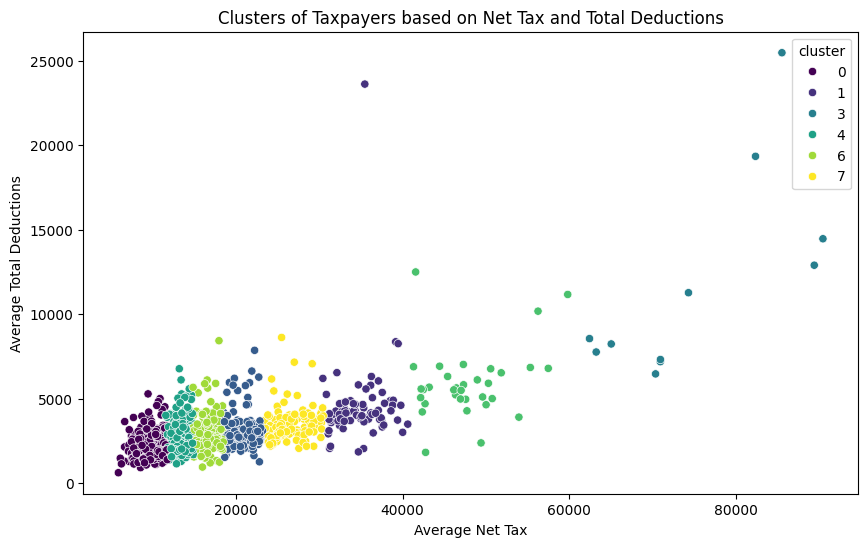

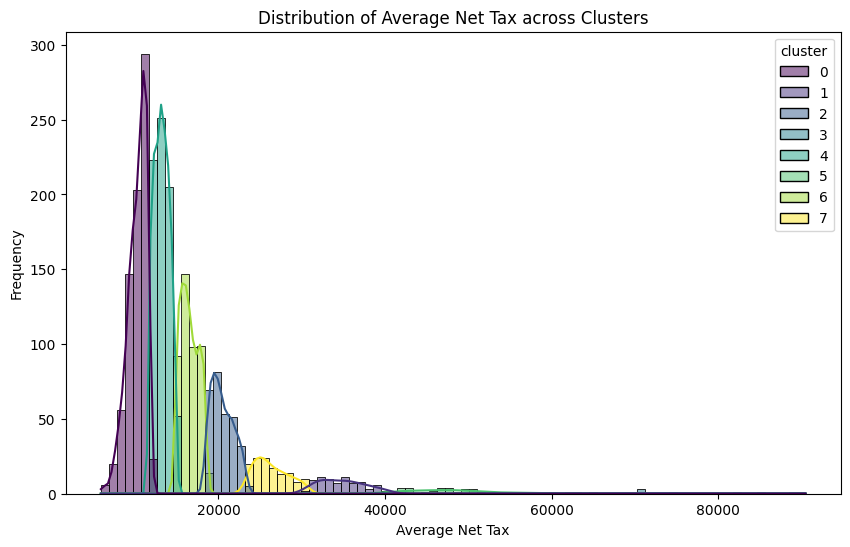

In [11]:
# prompt: based on this cluster analysis - please create 2 visuals

import matplotlib.pyplot as plt
import seaborn as sns

# Visual 1: Scatter plot of Average net tax vs. Average total deductions, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average net tax', y='Average total deductions', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Taxpayers based on Net Tax and Total Deductions')
plt.xlabel('Average Net Tax')
plt.ylabel('Average Total Deductions')
plt.show()

# Visual 2: Distribution of Average net tax within each cluster
plt.figure(figsize=(10, 6))
sns.histplot(x='Average net tax', hue='cluster', data=df, kde=True, palette='viridis')
plt.title('Distribution of Average Net Tax across Clusters')
plt.xlabel('Average Net Tax')
plt.ylabel('Frequency')
plt.show()


In [12]:
import numpy as np
df.pivot_table(values=['Average net tax', 'Average total deductions'], index='cluster', aggfunc=np.mean)

<ipython-input-12-b4875139faa7>:2: FutureWarning: The provided callable <function mean at 0x7c40ecfb93a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values=['Average net tax', 'Average total deductions'], index='cluster', aggfunc=np.mean)


,Average net tax,Average total deductions
cluster,,
0,10231.554072,2185.403204
1,34823.298701,4531.480519
2,20475.474227,2900.529210
3,75028.181818,11730.818182
4,13183.445355,2499.915301
5,47825.090909,5933.606061
6,16523.331111,2660.442222
7,26329.215385,3480.092308


In [13]:
import altair as alt
alt.Chart(df).mark_circle(size=60).encode(
    x='Average net tax',
    y='Average total deductions',
    color='cluster',
    tooltip=['Postcode', 'Average net tax', 'Average total deductions']
).interactive

<bound method Chart.interactive of alt.Chart(...)>

In [14]:
chart = alt.Chart(df)
scatter_plot = chart.mark_circle()
scatter_plot.encode(x='Average net tax', y='Average total deductions', color='cluster:N')

alt.Chart(...)

In [15]:
scatter_plot.encode(x='Average net tax', \
                    y='Average total deductions', \
                    color='cluster:N', \
                    tooltip=['Postcode', \
                             'cluster', 'Average net tax', \
'Average total deductions'])\
                    .interactive()

alt.Chart(...)

# Cluster ATO by Business Income and Expenses

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import altair as alt
import numpy as np

In [18]:
df = pd.read_csv(file_url, usecols=['Postcode', 'Average total business income', 'Average total business expenses'])

In [19]:
df.tail(10)

,Postcode,Average total business income,Average total business expenses
2463,852,95299,79526
2464,853,21186,15336
2465,854,49303,29720
2466,860,63190,55802
2467,862,134224,144254
2468,870,62793,44687
2469,872,53025,45670
2470,880,45603,28700
2471,885,53148,39850
2472,886,121057,90120


In [ ]:
X = df[['Average total business income', 'Average total business expenses']]

In [20]:
kmeans = KMeans(random_state=8)
kmeans.fit(X)

KMeans(random_state=8)

In [21]:
y_preds = kmeans.predict(X)
y_preds[-10:]

array([2, 5, 2, 5, 2, 5, 2, 0, 4, 0], dtype=int32)

In [22]:
df['cluster'] = y_preds
df.tail(10)

,Postcode,Average total business income,Average total business expenses,cluster
2463,852,95299,79526,2
2464,853,21186,15336,5
2465,854,49303,29720,2
2466,860,63190,55802,5
2467,862,134224,144254,2
2468,870,62793,44687,5
2469,872,53025,45670,2
2470,880,45603,28700,0
2471,885,53148,39850,4
2472,886,121057,90120,0


In [23]:
df.pivot_table(values=['Average total business income', 'Average total business expenses'], index='cluster', aggfunc=np.mean)


<ipython-input-23-b31f44b36536>:1: FutureWarning: The provided callable <function mean at 0x7c40ecfb93a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values=['Average total business income', 'Average total business expenses'], index='cluster', aggfunc=np.mean)


,Average total business expenses,Average total business income
cluster,,
0,69932.319742,90374.478541
1,98030.153846,146044.938462
2,66996.565104,80894.627604
3,208783.600000,288729.800000
4,85036.308333,119477.158333
5,64863.764706,81892.931818
6,72840.283688,98069.290780
7,134733.157895,203336.526316


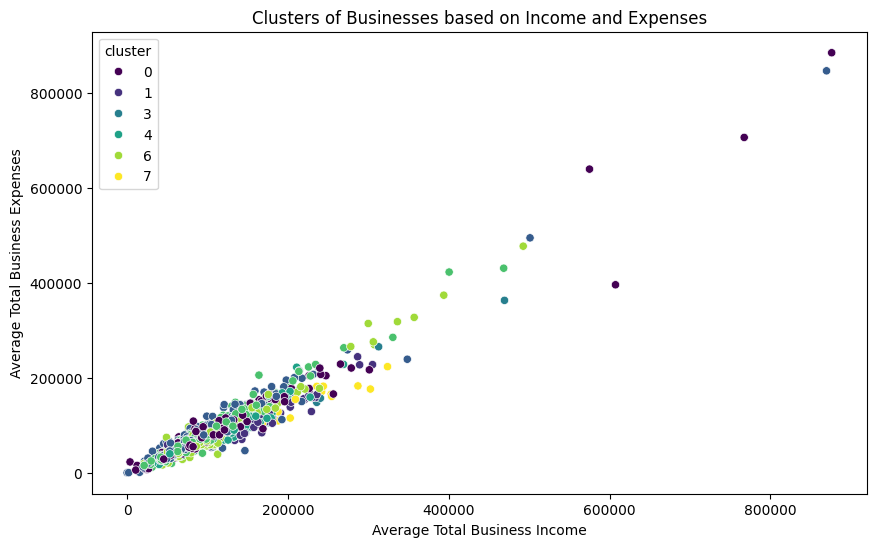

<ipython-input-24-406c7ffeda58>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='Average total business income', data=df, palette='viridis')


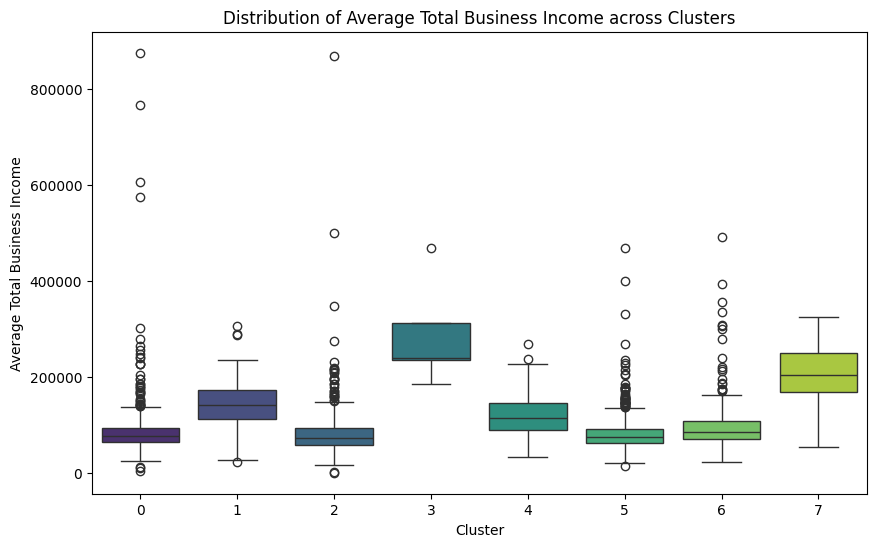

In [24]:
# prompt: please create 2 visuals for the above data

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code for data loading and clustering)

# Visual 1: Scatter plot of Average total business income vs. Average total business expenses, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average total business income', y='Average total business expenses', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Businesses based on Income and Expenses')
plt.xlabel('Average Total Business Income')
plt.ylabel('Average Total Business Expenses')
plt.show()


# Visual 2: Box plot of Average total business income per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='Average total business income', data=df, palette='viridis')
plt.title('Distribution of Average Total Business Income across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Total Business Income')
plt.show()


In [26]:
scatter_plot = alt.Chart(df).mark_circle()
scatter_plot.encode(x='Average total business income', y='Average total business expenses', color='cluster:N', tooltip=['Postcode', 'cluster', 'Average total business income', 'Average total business expenses']).interactive()


alt.Chart(...)

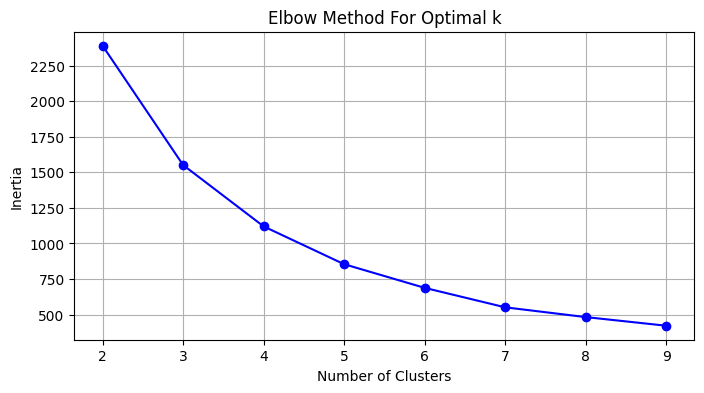

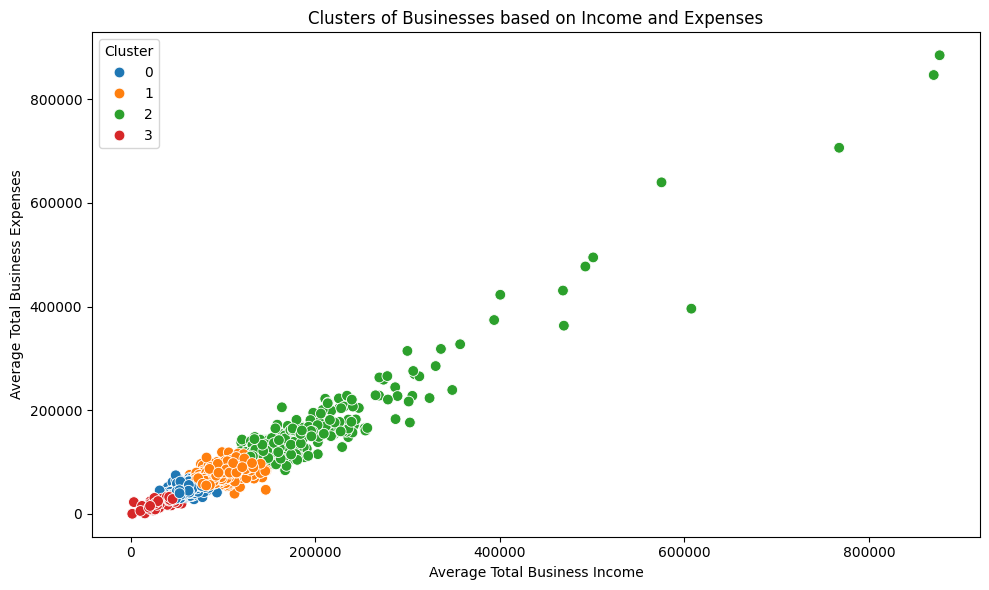

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load data
file_url = "https://raw.githubusercontent.com/fenago/datasets/refs/heads/main/taxstats2015.csv"
df = pd.read_csv(file_url, usecols=['Postcode', 'Average total business income', 'Average total business expenses'])

# Drop rows with missing or zero/negative values
df = df[(df['Average total business income'] > 0) & (df['Average total business expenses'] > 0)].dropna()

# Log transform to reduce skew
df['log_income'] = np.log(df['Average total business income'])
df['log_expenses'] = np.log(df['Average total business expenses'])

# Standardize the data
X = df[['log_income', 'log_expenses']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Choose optimal k (you can adjust based on the elbow plot)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Average total business income',
    y='Average total business expenses',
    hue='cluster',
    palette='tab10',
    s=60
)
plt.title('Clusters of Businesses based on Income and Expenses')
plt.xlabel('Average Total Business Income')
plt.ylabel('Average Total Business Expenses')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


# Finding the Best number of clusters

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
import altair as alt

In [29]:
df = pd.read_csv(file_url, \
                 usecols=['Postcode', \
                          'Average total business income', \
'Average total business expenses'])

In [30]:
X = df[['Average total business income', \
        'Average total business expenses']]

In [31]:
clusters = pd.DataFrame()
inertia = []

In [33]:
clusters['cluster_range'] = range(1,15)

In [34]:
for k in clusters['cluster_range']:
    kmeans = KMeans(n_clusters=k).fit(X)
    inertia.append(kmeans.inertia_)

In [35]:
clusters['inertia'] = inertia
clusters

,cluster_range,inertia
0,1,1.333516e+13
1,2,7.063097e+12
2,3,3.718740e+12
3,4,2.371958e+12
4,5,1.713828e+12
5,6,1.256178e+12
6,7,9.420224e+11
7,8,7.512590e+11
8,9,6.733241e+11
9,10,5.815815e+11


In [36]:
alt.Chart(clusters).mark_line()\
   .encode(alt.X('cluster_range'), alt.Y('inertia'))

alt.Chart(...)

In [37]:
optim_cluster = 4
kmeans = KMeans(random_state=42, n_clusters=optim_cluster)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [38]:
df['cluster2'] = kmeans.predict(X)

In [39]:
df.head()

,Postcode,Average total business income,Average total business expenses,cluster2
0,2000,210901,222191,1
1,2006,69983,48971,0
2,2007,575099,639499,3
3,2008,53329,32173,0
4,2009,237539,222993,1


In [40]:
alt.Chart(df).mark_circle()\
             .encode\
              (x='Average total business income', \
               y='Average total business expenses', \
               color='cluster2:N', \
               tooltip=['Postcode', 'cluster2', \
                        'Average total business income',\
'Average total business expenses'])\
             .interactive()

alt.Chart(...)

In [41]:
# prompt: please give me a visual that shows the centroid

# ... (Your existing code)

# Finding the Best number of clusters
df = pd.read_csv(file_url, \
                 usecols=['Postcode', \
                          'Average total business income', \
'Average total business expenses'])
X = df[['Average total business income', \
        'Average total business expenses']]
clusters = pd.DataFrame()
inertia = []
clusters['cluster_range'] = range(1,15)
for k in clusters['cluster_range']:
    kmeans = KMeans(n_clusters=k).fit(X)
    inertia.append(kmeans.inertia_)
clusters['inertia'] = inertia
clusters
alt.Chart(clusters).mark_line()\
   .encode(alt.X('cluster_range'), alt.Y('inertia'))
optim_cluster = 4
kmeans = KMeans(random_state=42, n_clusters=optim_cluster)
kmeans.fit(X)
df['cluster2'] = kmeans.predict(X)
df.head()

# Visualize centroids
centroids = kmeans.cluster_centers_

alt.Chart(df).mark_circle().encode(
    x='Average total business income',
    y='Average total business expenses',
    color='cluster2:N',
    tooltip=['Postcode', 'cluster2', 'Average total business income', 'Average total business expenses']
).interactive() + alt.Chart(pd.DataFrame(centroids, columns=['Average total business income', 'Average total business expenses'])).mark_point(size=100, shape='diamond', filled=True, color='black').encode(
    x='Average total business income',
    y='Average total business expenses'
)


alt.LayerChart(...)